/var/folders/lx/yxd1knvn4n331lpc04sqr1sw0000gn/T/ipykernel_97725/1909028348.py:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


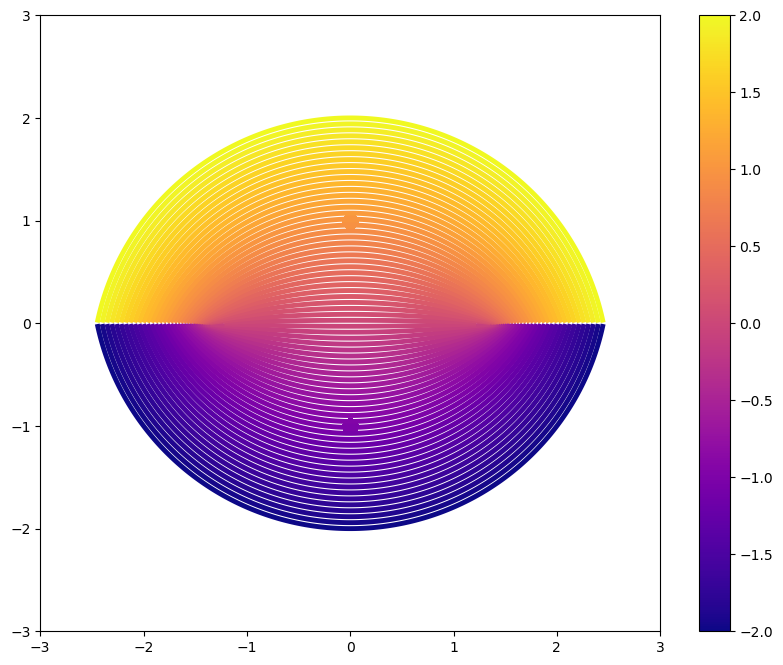

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
def implicit_eq(x, y, a):
    condition = 3 * a**2 > (x**2 + y**2 - 2)
    result = np.where(condition, a**3 - (x**2 + y**2 - 2)*a - 2*y, np.nan)
    return result

# Generate a grid of x and y values
x = np.linspace(-3, 3, 400)  # Restrict x range
y = np.linspace(-3, 3, 400)  # Restrict y range
X, Y = np.meshgrid(x, y)

# Values of 'a' to plot
a_values = np.linspace(-2, 2, 70)

# Create the plot
plt.figure(figsize=(10, 8))

# Create a colormap
cmap = plt.cm.plasma  # Change to plasma colormap

# Get the colors for a=1 and a=-1
color_a1 = cmap((1 - a_values.min()) / (a_values.max() - a_values.min()))
color_a_minus1 = cmap((-1 - a_values.min()) / (a_values.max() - a_values.min()))

for a in a_values:
    Z = implicit_eq(X, Y, a)
    if a >= 0:
        Z[Y <= 0] = np.nan  # Mask out y < 0 for a >= 0
    else:
        Z[Y >= 0] = np.nan  # Mask out y >= 0 for a < 0
    contour = plt.contour(X, Y, Z, levels=[0], colors=[cmap((a - a_values.min()) / (a_values.max() - a_values.min()))])
    for c in contour.collections:
        c.set_linewidth(3.5)  # Make the lines thicker

# Add scatter plot
plt.scatter([0]*500, [1]*500, color=color_a1, s=100)  # 500 points at (0, 1)
plt.scatter([0]*500, [-1]*500, color=color_a_minus1, s=100)  # 500 points at (0, -1)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(a_values)
cbar = plt.colorbar(sm)

plt.xlim(-3, 3)  # Set x-axis limit
plt.ylim(-3, 3)  # Set y-axis limit

plt.show()
